In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import *
import datetime
zxynb = 1
%matplotlib inline

In [25]:
def rotateImage(img, degree, pt1, pt2, pt3, pt4): 
  print(pt1,pt2,pt3,pt4)
  height, width = img.shape[:2]
  heightNew = int(width * fabs(sin(radians(degree))) +
                  height * fabs(cos(radians(degree))))
  widthNew = int(height * fabs(sin(radians(degree))) +
                 width * fabs(cos(radians(degree))))
  matRotation = cv2.getRotationMatrix2D((width//2, height//2), degree, 1)
#   print(matRotation)
  matRotation[0, 2] += (widthNew - width) / 2
  matRotation[1, 2] += (heightNew - height) / 2
  print(matRotation)
  imgRotation = cv2.warpAffine(
      img, matRotation, (widthNew, heightNew), borderValue=(255, 255, 255))
  pt1 = list(pt1)
  pt3 = list(pt3)
  [[pt1[0]], [pt1[1]]] = np.dot(
      matRotation, np.array([[pt1[0]], [pt1[1]], [1]]))
  [[pt3[0]], [pt3[1]]] = np.dot(
      matRotation, np.array([[pt3[0]], [pt3[1]], [1]]))
  print(pt1,pt3,pt2,pt4)
  xmin = np.max([np.min([pt1[1],pt3[1]]),0])
  xmax = np.min([np.max([pt1[1],pt3[1]]),imgRotation.shape[0]])
  ymin = np.max([np.min([pt1[0],pt3[0]]),0])
  ymax = np.min([np.max([pt1[0],pt3[0]]),imgRotation.shape[1]])
  print(imgRotation.shape)
  print(xmin,xmax,ymin,ymax)
  imgOut = imgRotation[int(xmin):int(xmax), int(ymin):int(ymax)]

  imgOut = cv2.resize(imgOut, (500, 500))
  return imgOut;

import webcolors
# '#daa520': 'orange',
simple_colors = {'#f0e68c': 'yellow','#a52a2a': 'red','#f4a460': 'orange','#d2691e': 'orange','#db7093':'violet','#90ee90':'green','#deb887': 'burlywood','#e9967a': 'red','#ffd700':'yellow','#d2b48c': 'tan','#483d8b': 'purple','#ff6347':'tomato','#6495ed':'cornflowerblue','#9370db': 'mediumpurple','#4169e1': 'royalblue','#00ffff': 'cyan', '#0000ff': 'blue','#8b0000': 'darkred','#808080': 'gray','#008000': 'green', '#ff0000': 'red','#800080': 'purple','#ffa500': 'orange', '#ffc0cb': 'pink','#ffffe0': 'lightyellow','#ffff00': 'yellow','#3cb371':'mediumseagreen'}.items()
 # gold,tan, darkslateblue
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in simple_colors:
#     for key, name in webcolors.css3_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

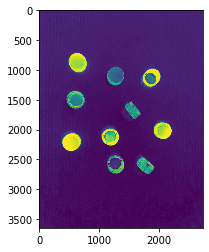

In [3]:
origin = cv2.imread("./resource/dones/C99D9FABEA5CDC211CE19CD5FF012B46.jpg")
# 33D382B156E9A414B80265A42C67FFE2.jpg
hsv = cv2.cvtColor(origin,cv2.COLOR_BGR2HSV)

# lower_blue = np.array([10,50,50])
# upper_blue = np.array([180,255,255])
# mask = cv2.inRange(hsv,lower_blue,upper_blue)
# img = cv2.resize(mask,(300,300))
h,s,v = cv2.split(hsv)
plt.imshow(s)

In [4]:
# gray = cv2.cvtColor(origin, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray)
gray = s

In [5]:
# gray = cv2.blur(s,(30,30))
# plt.imshow(s)

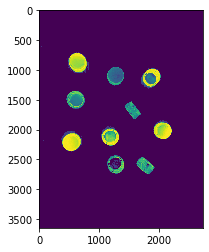

In [6]:
(_, gray) = cv2.threshold(s, 35, 255, cv2.THRESH_TOZERO)
plt.imshow(gray)

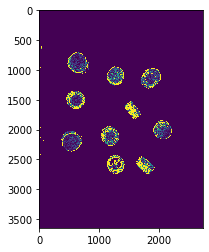

In [7]:
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
 
# subtract the y-gradient from the x-gradient
gradient = cv2.add(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
plt.imshow(gradient)

In [8]:
# blurred = cv2.medianBlur(gradient, 9)
# plt.imshow(blurred)
blurred = gradient

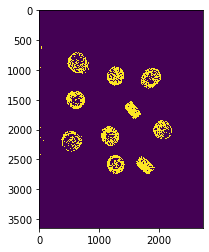

In [9]:
(_, thresh) = cv2.threshold(blurred, 35, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

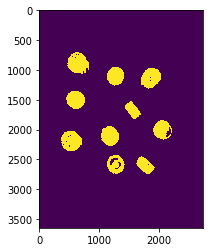

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
#  7,7
cl = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(cl)

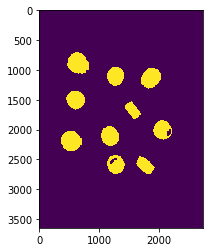

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30,30))
closed = cv2.morphologyEx(cl, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

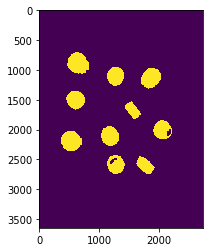

In [12]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)
plt.imshow(closed)

------------------
[1827 2777] [1572 2561] [1700 2410] [1954 2626]
[[-6.46344569e-01  7.63045672e-01  1.76790406e+03]
 [-7.63045672e-01 -6.46344569e-01  4.44527897e+03]]
[2706.0103682020945, 1256.2956619480037] [2508.0583668420345, 1590.410919243367] [1572 2561] [1954 2626]
(4445, 4551, 3)
1256.2956619480037 1590.410919243367 2508.0583668420345 2706.0103682020945
------------------
[1182 2774] [1097 2466] [1378 2389] [1462 2697]
[[-9.63964947e-01  2.66029287e-01  2.63696663e+03]
 [-2.66029287e-01 -9.63964947e-01  4.24420013e+03]]
[2235.5253029337364, 1255.714748119874] [1944.1668978133323, 1574.6995122790654] [1097 2466] [1462 2697]
(4244, 3607, 3)
1255.714748119874 1574.6995122790654 1944.1668978133323 2235.5253029337364
------------------
[ 551 2436] [ 286 2202] [ 509 1949] [ 774 2184]
[[-6.61902254e-01  7.49590159e-01  1.81072983e+03]
 [-7.49590159e-01 -6.61902254e-01  4.46524905e+03]]
[3272.023318605121, 2439.830980715873] [2934.7728057899794, 2793.660164936062] [ 286 2202] [ 774 2

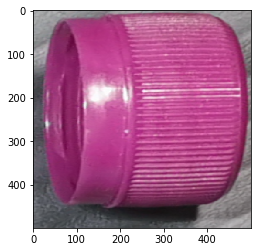

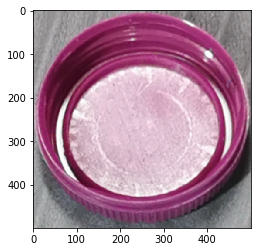

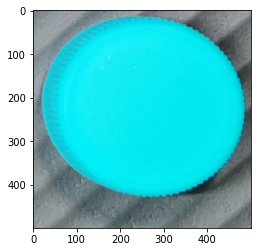

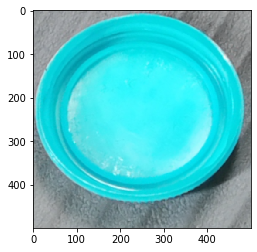

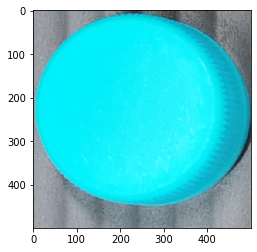

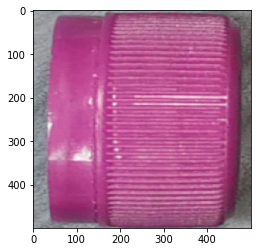

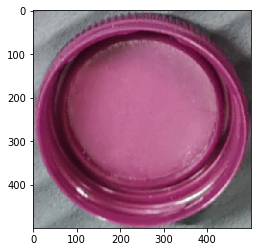

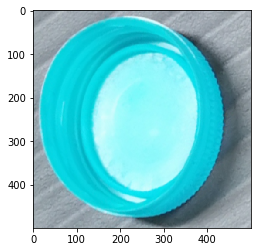

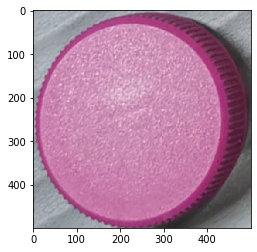

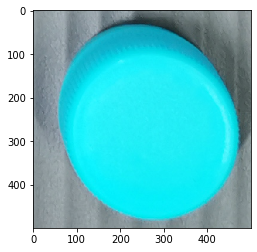

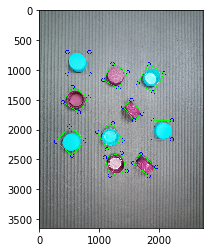

In [13]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]
ct = 0
ls = []
res = np.copy(origin)
imgls = []
for c in cnts:
    if len(c) <= 200:
        continue
#     print(c)
    ct = ct + 1
    ls.append(len(c))
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    box = np.int0(cv2.boxPoints(rect))
    print("------------------")
    #print(-degrees(atan2(box[1][1]-box[0][1],box[1][0]-box[0][0])))
    imgOut = rotateImage(origin, -degrees(atan2(box[1][0]-box[0][0],box[1][1]-box[0][1])), box[0], box[1], box[2], box[3])
    
    now = datetime.datetime.now()
    global zxynb
    filename = str(now.strftime("%d-%H-%M-%S"))
    num_of_pages = str(zxynb)
    filename = './'+filename + '_'+ num_of_pages +'.jpg'
#     cv2.imwrite(filename, imgOut)
    zxynb = zxynb+1
    imgls.append(imgOut)
    plt.imshow(imgOut)
    plt.figure()
#   cv2.imshow("imgOut", imgOut)  # 裁减得到的旋转矩形框
#   cv2.waitKey(0)
#   cv2.destroyAllWindows()
#     label = input("input:")  
#     dataframe = pd.DataFrame({'filename':[filename],'label':[label]})
#     dataframe.to_csv('label.csv', mode='a', index=False, header=False)   
    
    
    point_color = (0, 0, 255)
    for i in box:
        res = cv2.circle(res,(i[0],i[1]),30,point_color,8)
    # draw a bounding box arounded the detected barcode and display the image
    res = cv2.drawContours(res, [box], -1, (0, 255, 0), 10)
plt.imshow(res)
print(ct)
print(ls)

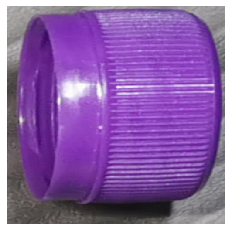

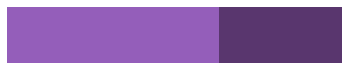

mediumpurple


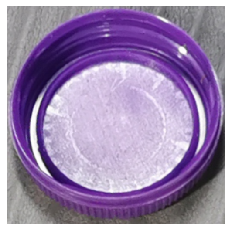

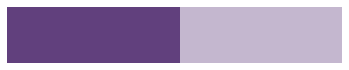

purple


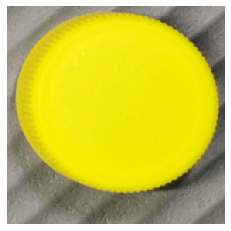

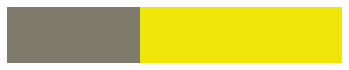

yellow


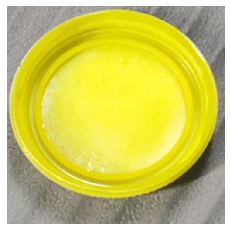

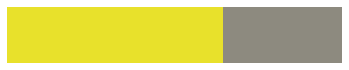

yellow


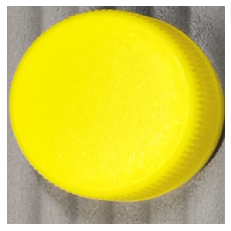

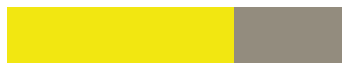

yellow


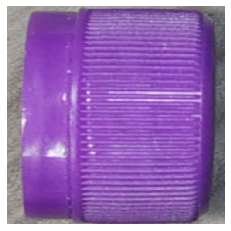

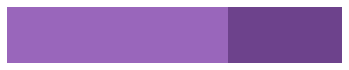

mediumpurple


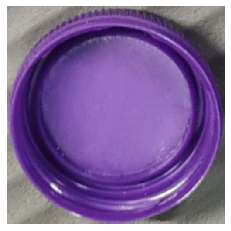

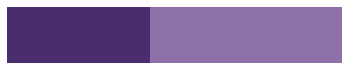

purple


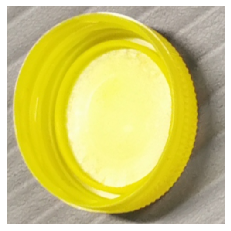

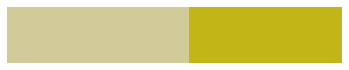

orange


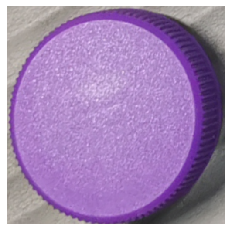

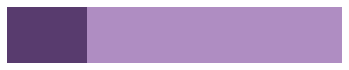

mediumpurple


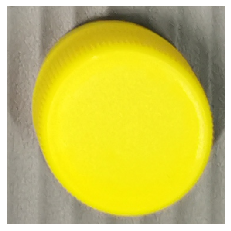

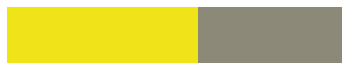

yellow


In [26]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
 
    # normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()
 
	# return the histogram
	return hist
def plot_colors(hist, centroids):
# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
def showclt(clt):
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)

    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    
for img in imgls:
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    plt.show()
    #
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = 2)
    clt.fit(image)
    showclt(clt)
    hist = centroid_histogram(clt)
    if hist[0] > hist[1] :
        prominant_color = clt.cluster_centers_[0]
        support_color = clt.cluster_centers_[1]
    else :
        prominant_color = clt.cluster_centers_[1]
        support_color = clt.cluster_centers_[0]
    closestColor = closest_colour(prominant_color)
    if closestColor == "gray" or closestColor == "tan" or closestColor == "burlywood":
        closestColor = closest_colour(support_color)
    
    print(closestColor)

In [15]:
def detect_color(images):

    colorlist = []
    for img in images:
        image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image = image.reshape((image.shape[0] * image.shape[1], 3))
        clt = KMeans(n_clusters = 2)
        clt.fit(image)
        hist = centroid_histogram(clt)
        if hist[0] > hist[1] :
            prominant_color = clt.cluster_centers_[0]
        else :
            prominant_color = clt.cluster_centers_[1]
        colorlist.append(prominant_color.astype("uint8"))
    return colorlist

In [16]:
colorlist= detect_color([imgOut])

In [17]:
print(colorlist)

[array([239, 228,  23], dtype=uint8)]


In [18]:
get_colour_name((209,  92,  95))

(None, 'indianred')

In [19]:
import webcolors
print(webcolors.css3_hex_to_names.items())
{'#00ffff': 'cyan', '#0000ff': 'blue','#8b0000': 'darkred','#808080': 'gray','#008000': 'green', '#ff0000': 'red','#800080': 'purple','#ffa500': 'orange', '#ffc0cb': 'pink','#ffffe0': 'lightyellow','#ffff00': 'yellow','#556b2f': 'darkolivegreen','#8fbc8f': 'darkseagreen', }


dict_items([('#f0f8ff', 'aliceblue'), ('#faebd7', 'antiquewhite'), ('#00ffff', 'cyan'), ('#7fffd4', 'aquamarine'), ('#f0ffff', 'azure'), ('#f5f5dc', 'beige'), ('#ffe4c4', 'bisque'), ('#000000', 'black'), ('#ffebcd', 'blanchedalmond'), ('#0000ff', 'blue'), ('#8a2be2', 'blueviolet'), ('#a52a2a', 'brown'), ('#deb887', 'burlywood'), ('#5f9ea0', 'cadetblue'), ('#7fff00', 'chartreuse'), ('#d2691e', 'chocolate'), ('#ff7f50', 'coral'), ('#6495ed', 'cornflowerblue'), ('#fff8dc', 'cornsilk'), ('#dc143c', 'crimson'), ('#00008b', 'darkblue'), ('#008b8b', 'darkcyan'), ('#b8860b', 'darkgoldenrod'), ('#a9a9a9', 'darkgray'), ('#006400', 'darkgreen'), ('#bdb76b', 'darkkhaki'), ('#8b008b', 'darkmagenta'), ('#556b2f', 'darkolivegreen'), ('#ff8c00', 'darkorange'), ('#9932cc', 'darkorchid'), ('#8b0000', 'darkred'), ('#e9967a', 'darksalmon'), ('#8fbc8f', 'darkseagreen'), ('#483d8b', 'darkslateblue'), ('#2f4f4f', 'darkslategray'), ('#00ced1', 'darkturquoise'), ('#9400d3', 'darkviolet'), ('#ff1493', 'deeppink

{'#00ffff': 'cyan',
 '#0000ff': 'blue',
 '#8b0000': 'darkred',
 '#808080': 'gray',
 '#008000': 'green',
 '#ff0000': 'red',
 '#800080': 'purple',
 '#ffa500': 'orange',
 '#ffc0cb': 'pink',
 '#ffffe0': 'lightyellow',
 '#ffff00': 'yellow',
 '#556b2f': 'darkolivegreen',
 '#8fbc8f': 'darkseagreen'}

In [20]:
print(webcolors.css3_hex_to_names.items())

dict_items([('#f0f8ff', 'aliceblue'), ('#faebd7', 'antiquewhite'), ('#00ffff', 'cyan'), ('#7fffd4', 'aquamarine'), ('#f0ffff', 'azure'), ('#f5f5dc', 'beige'), ('#ffe4c4', 'bisque'), ('#000000', 'black'), ('#ffebcd', 'blanchedalmond'), ('#0000ff', 'blue'), ('#8a2be2', 'blueviolet'), ('#a52a2a', 'brown'), ('#deb887', 'burlywood'), ('#5f9ea0', 'cadetblue'), ('#7fff00', 'chartreuse'), ('#d2691e', 'chocolate'), ('#ff7f50', 'coral'), ('#6495ed', 'cornflowerblue'), ('#fff8dc', 'cornsilk'), ('#dc143c', 'crimson'), ('#00008b', 'darkblue'), ('#008b8b', 'darkcyan'), ('#b8860b', 'darkgoldenrod'), ('#a9a9a9', 'darkgray'), ('#006400', 'darkgreen'), ('#bdb76b', 'darkkhaki'), ('#8b008b', 'darkmagenta'), ('#556b2f', 'darkolivegreen'), ('#ff8c00', 'darkorange'), ('#9932cc', 'darkorchid'), ('#8b0000', 'darkred'), ('#e9967a', 'darksalmon'), ('#8fbc8f', 'darkseagreen'), ('#483d8b', 'darkslateblue'), ('#2f4f4f', 'darkslategray'), ('#00ced1', 'darkturquoise'), ('#9400d3', 'darkviolet'), ('#ff1493', 'deeppink

In [21]:
{'#00ffff': 'cyan', '#0000ff': 'blue','#8b0000': 'darkred','#808080': 'gray','#008000': 'green', '#ff0000': 'red','#800080': 'purple','#ffa500': 'orange', '#ffc0cb': 'pink','#ffffe0': 'lightyellow','#ffff00': 'yellow','#556b2f': 'darkolivegreen','#8fbc8f': 'darkseagreen'}.items()


dict_items([('#00ffff', 'cyan'), ('#0000ff', 'blue'), ('#8b0000', 'darkred'), ('#808080', 'gray'), ('#008000', 'green'), ('#ff0000', 'red'), ('#800080', 'purple'), ('#ffa500', 'orange'), ('#ffc0cb', 'pink'), ('#ffffe0', 'lightyellow'), ('#ffff00', 'yellow'), ('#556b2f', 'darkolivegreen'), ('#8fbc8f', 'darkseagreen')])